## Homework 1 ##

# Exercise 2 #

Perform the quasi stationary approximation of the consumer resource model with 1 species and 1 resources for the abiotic case (without Monod). Check the analytical result with simulations. If you add Monod, numerically how the solutions change?

In [2]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt


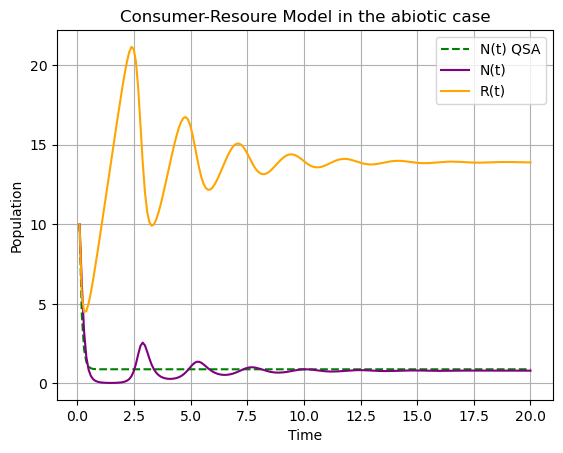

In [28]:
## PARAMETERS
# g: gamma -> yield coeffiient; (0,inf)
# d: death rate; [0,1]
# s: supply rate; (0,inf)
# c: efficiency of the uptake rate; [0,1]
# N0: initial population; [0,inf)

## VARIABLES
# N: population
# t: time

g = 0.8
d = 10
s = 10
c = 0.9
mu = 0.0005
K = 5

# Z = [N, R]
z = [10,10]
def CRM(z,t):
    dndt = (g * c * z[1] - d) * z[0]
    drdt = s - c * z[1] * z[0]
    return [dndt, drdt]

# Without Monod:
def pop(N,t):
    return (((g * s) / (c * N)) - d) * N

'''
# With Monod: 
def monod(z,t):
    m = mu * (z[1] / (K + z[1]))
    dndt = (g * c * m - d) * z[0]
    drdt = s - c * z[1] * z[0]
    return [dndt, drdt]
'''

# Set the time span 
t_s = np.linspace(0.1, 20, 201) # in seconds

# Solve
#sol = solve_ivp(pop, t_s, N0, method='RK45')
sol_n = odeint(pop,z[0],t_s)

sol_z = odeint(CRM, z, t_s)

#sol_m = odeint(monod, z, t_s)

# Plot the results
plt.plot(t_s, sol_n, label='N(t) QSA', color='g', linestyle='--')
#plt.plot(t_s, sol_m, label='N(t) w Monod', color='r')
plt.plot(t_s, sol_z[:,0], label="N(t)", color="purple")
plt.plot(t_s, sol_z[:,1], label="R(t)", color="orange")
#plt.plot(t_s, sol_m[:,0], label='Monod', color='r')
#plt.plot(t_s, sol_m[:,1], label='Monod-r', color='b')
plt.grid()
plt.title("Consumer-Resoure Model in the abiotic case")
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

#plt.plot(t_s, sol_z[:,1], label="R(t)", color="orange")
#plt.plot(t_s, sol_r, label="R(t)", color="r")
#plt.plot(t_s, r_star(sol_z[:,0]), linestyle='--', color='g')
#plt.axhline(d / (g * c))